# Libraries and Helper Functions

In [158]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
def model_evaluation(y, predictions, label, scores_df):
    class_labels = ['Not Readmitted', 'Readmitted']
    #calculate accuracy
    accuracy = accuracy_score(y, predictions)
    print('{0} Accuracy: {1:.4f}'.format(label, accuracy))
    #calculate precision
    precision = precision_score(y, predictions)
    print('{0} Precision: {1:.4f}'.format(label, precision))
    #calculate recall
    recall = recall_score(y, predictions)
    print('{0} Recall: {1:.4f}'.format(label, recall))
    #calculate f1
    f1 = f1_score(y, predictions)
    print('{0} F1: {1:.4f}'.format(label, f1))    
    cm = confusion_matrix(y, predictions)
    df_cm = np.transpose( np.transpose(cm) / cm.astype(np.float).sum(axis=1) )
    df_cm = pd.DataFrame(df_cm, index = class_labels, columns = class_labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, fmt='.3f', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    scores_df_add = pd.DataFrame([[label, accuracy, precision, recall, f1]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    scores_df = pd.concat([scores_df, scores_df_add])
    return scores_df

In [216]:
def plot_roc(y, predictions, label):
    plt.figure(figsize=(20,20))
    
    models = [column for column in predictions.columns if 'Blind' not in column]
    # Compute fpr, tpr, thresholds and roc auc
    for model in models:
        prediction = predictions[model]
        fpr, tpr, thresholds = roc_curve(y, prediction)
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve
        plt.plot(fpr, tpr, label=model + ' ROC curve (area = %0.3f)' % roc_auc)
        
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('{0} ROC Curves'.format(label))
    plt.legend(loc="lower right")

    plt.show()

In [217]:
def plot_cost_effectiveness(y, predictions, label):
    plt.figure(figsize=(20,20))

    
    models = predictions.columns
    
    C_INTERVENTION = 1300 
    C_READMISSION = 13679
    P_REDUCTION = 1.0
    P_ALLPATIENT_READMISSION = y.sum() * 1.0 / y.shape[0]
    
    PROBABILITY_THRESHOLDS = xrange(0, 100, 1)
    
    for model in models:
        probabilities = predictions[model]
        costs = []
        for i in PROBABILITY_THRESHOLDS:
            i = i * 1.0 / 100.0
            prediction_values = probabilities > i
            total_cost = 0
            for actual, predicted in zip(y, prediction_values):
                c_intervention = C_INTERVENTION if predicted else 0
                p_reduction = P_REDUCTION if predicted and actual else 0
                c_readmission = C_READMISSION if actual else 0
                total_cost += (c_intervention + P_ALLPATIENT_READMISSION * (1.0 - p_reduction) * c_readmission)
            costs.append(total_cost)
        
        ls = '--' if 'Blind' in model else '-'
        plot_title = '{0} Costs | min = ${1:,.0f}'.format(model, min(costs))
        plt.plot(PROBABILITY_THRESHOLDS, costs, label = plot_title, ls = ls)
    
    plt.xlabel('Probability Threshold (%)')
    plt.ylabel('Program Cost')
    plt.title('{0} Program Costs'.format(label))
    plt.legend(loc="upper right")    
    plt.show()
    

In [162]:
def get_feature_importance(feature_importance, features):
    indices = np.argsort(feature_importance)[::-1]
    feature_importance = [feature_importance[i] for i in indices]
    features = [features[i] for i in indices]
    features_index = range(1, len(features) + 1)
    num_features = len(features)
    plt.figure(figsize=(20,20))
    plt.bar(features_index[:num_features], feature_importance[:num_features], align = 'center')
    plt.xticks(features_index[:num_features], features[:num_features], rotation = 'vertical')
    plt.show()

# Load Model Results

In [163]:
parameters_df = pd.read_csv('model_parameters_dataset.csv')
feature_importance_df = pd.read_csv('model_feature_importance_dataset.csv')
train_predictions_df = pd.read_csv('model_train_predictions_dataset.csv')
test_predictions_df = pd.read_csv('model_test_predictions_dataset.csv')

scores_df = pd.DataFrame()

# Best Model Parameters

In [164]:
for i in range(parameters_df.shape[0]):
    print('{0} = {1}'.format(parameters_df.iloc[i]['Name'], parameters_df.iloc[i]['Best Parameters']))
    print('\n')

Logistic Regression = {'penalty': 'l1', 'C': 10.0, 'random_state': 42, 'class_weight': 'balanced'}


XGBoost = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'min_child_weight': 1, 'n_estimators': 1000, 'subsample': 1, 'seed': 42, 'objective': 'binary:logistic', 'max_depth': 3, 'gamma': 0}


Random Forest = {'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 42, 'max_features': 'log2', 'max_depth': 100, 'class_weight': 'balanced'}


XGBoost = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'min_child_weight': 1, 'n_estimators': 1000, 'subsample': 1, 'reg_lambda': 1, 'seed': 42, 'objective': 'binary:logistic', 'max_depth': 3, 'gamma': 0}




# Individual Model Results

## Blind Guess Models

### No Readmission

Blind Guess None - Train Accuracy: 0.8235
Blind Guess None - Train Precision: 0.0000
Blind Guess None - Train Recall: 0.0000
Blind Guess None - Train F1: 0.0000


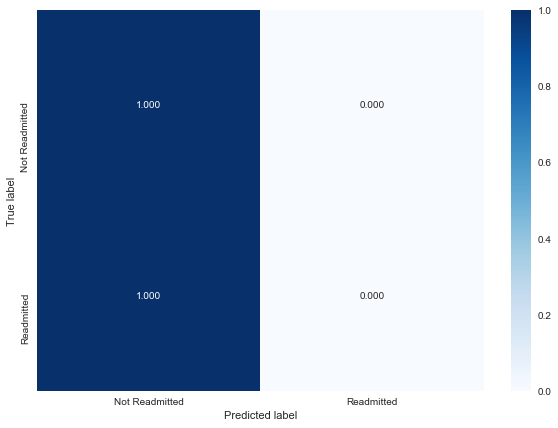

Blind Guess None - Test Accuracy: 0.8175
Blind Guess None - Test Precision: 0.0000
Blind Guess None - Test Recall: 0.0000
Blind Guess None - Test F1: 0.0000


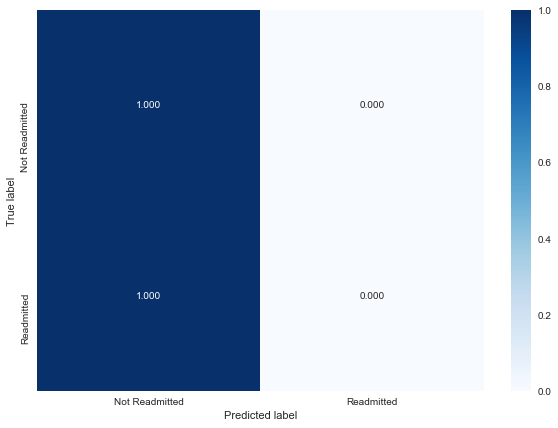

In [165]:
model_name = 'Blind Guess None'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'],
                                   model_name + ' - Test', scores_df)

### Readmission

Blind Guess All - Train Accuracy: 0.1765
Blind Guess All - Train Precision: 0.1765
Blind Guess All - Train Recall: 1.0000
Blind Guess All - Train F1: 0.3000


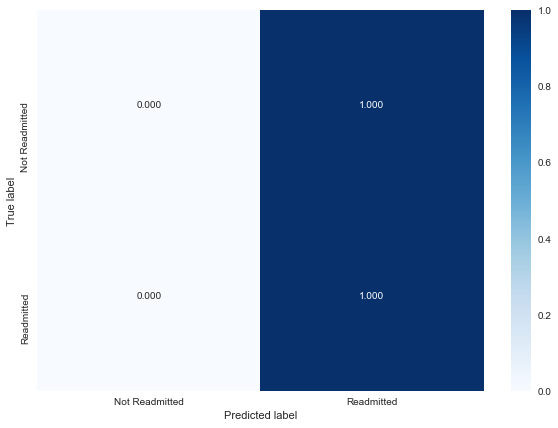

Blind Guess All - Test Accuracy: 0.1825
Blind Guess All - Test Precision: 0.1825
Blind Guess All - Test Recall: 1.0000
Blind Guess All - Test F1: 0.3086


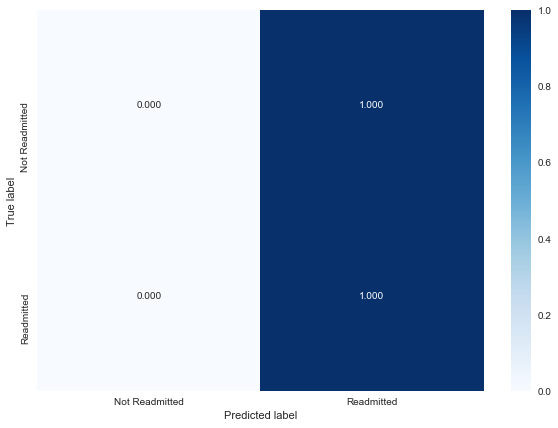

In [166]:
model_name = 'Blind Guess All'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'],
                                   model_name + ' - Test', scores_df)

# Logistic Regression

Logistic Regression - Train Accuracy: 0.6153
Logistic Regression - Train Precision: 0.2851
Logistic Regression - Train Recall: 0.7827
Logistic Regression - Train F1: 0.4180


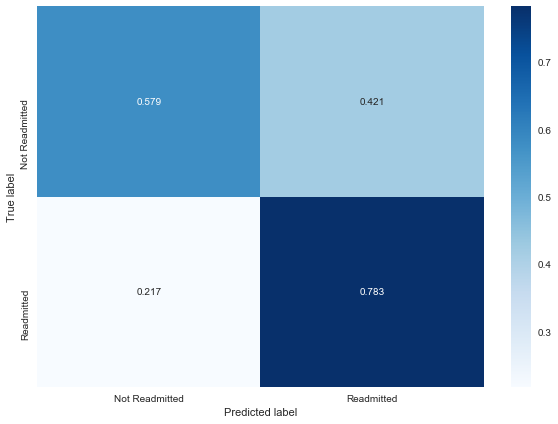

Logistic Regression - Test Accuracy: 0.6082
Logistic Regression - Test Precision: 0.2898
Logistic Regression - Test Recall: 0.7905
Logistic Regression - Test F1: 0.4241


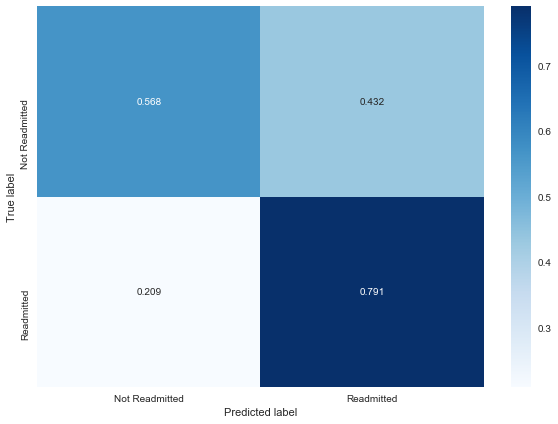

In [167]:
model_name = 'Logistic Regression'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'],
                                   model_name + ' - Test', scores_df)

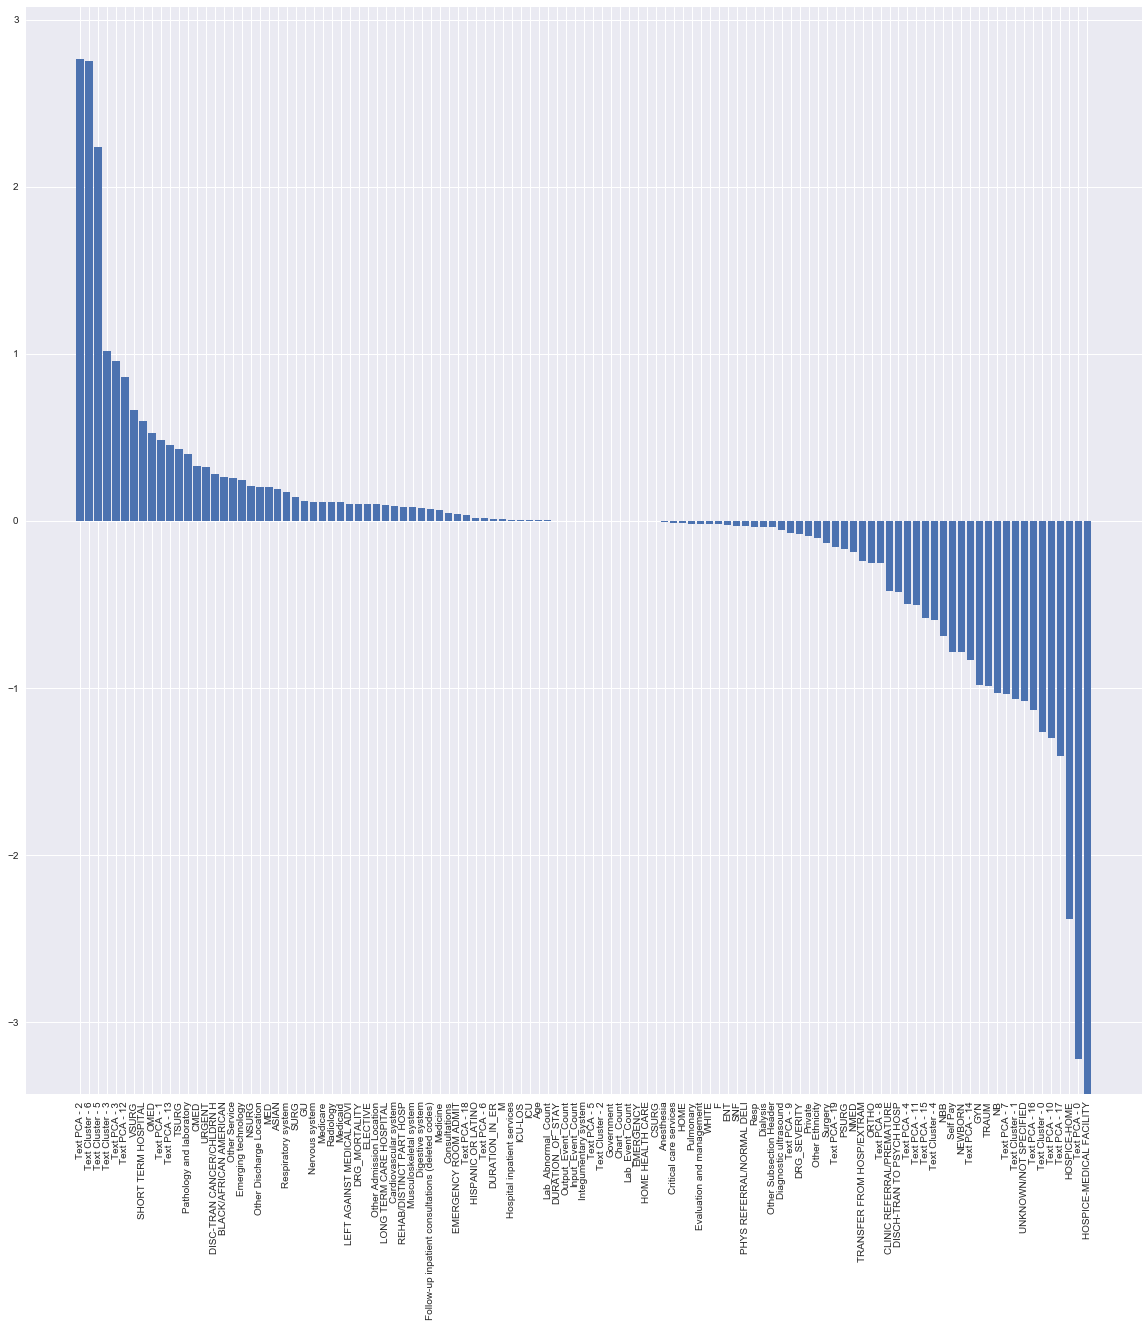

In [168]:
get_feature_importance(feature_importance_df[model_name], feature_importance_df['Features'])

## Random Forest

### All Features

Random Forest - Train Accuracy: 1.0000
Random Forest - Train Precision: 1.0000
Random Forest - Train Recall: 1.0000
Random Forest - Train F1: 1.0000


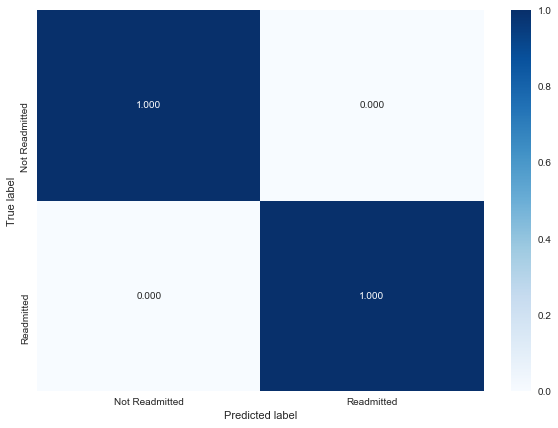

Random Forest - Test Accuracy: 0.8364
Random Forest - Test Precision: 0.8768
Random Forest - Test Recall: 0.1204
Random Forest - Test F1: 0.2117


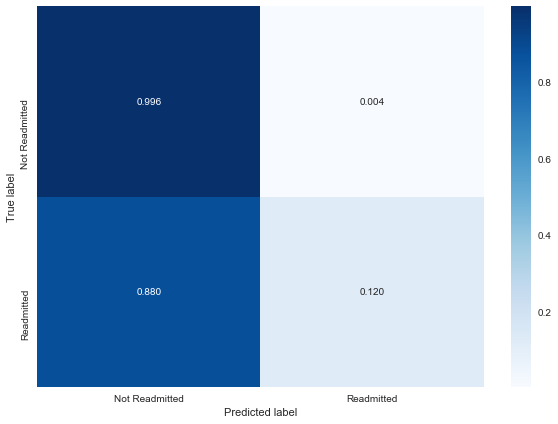

In [169]:
model_name = 'Random Forest'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'],
                                   model_name + ' - Test', scores_df)

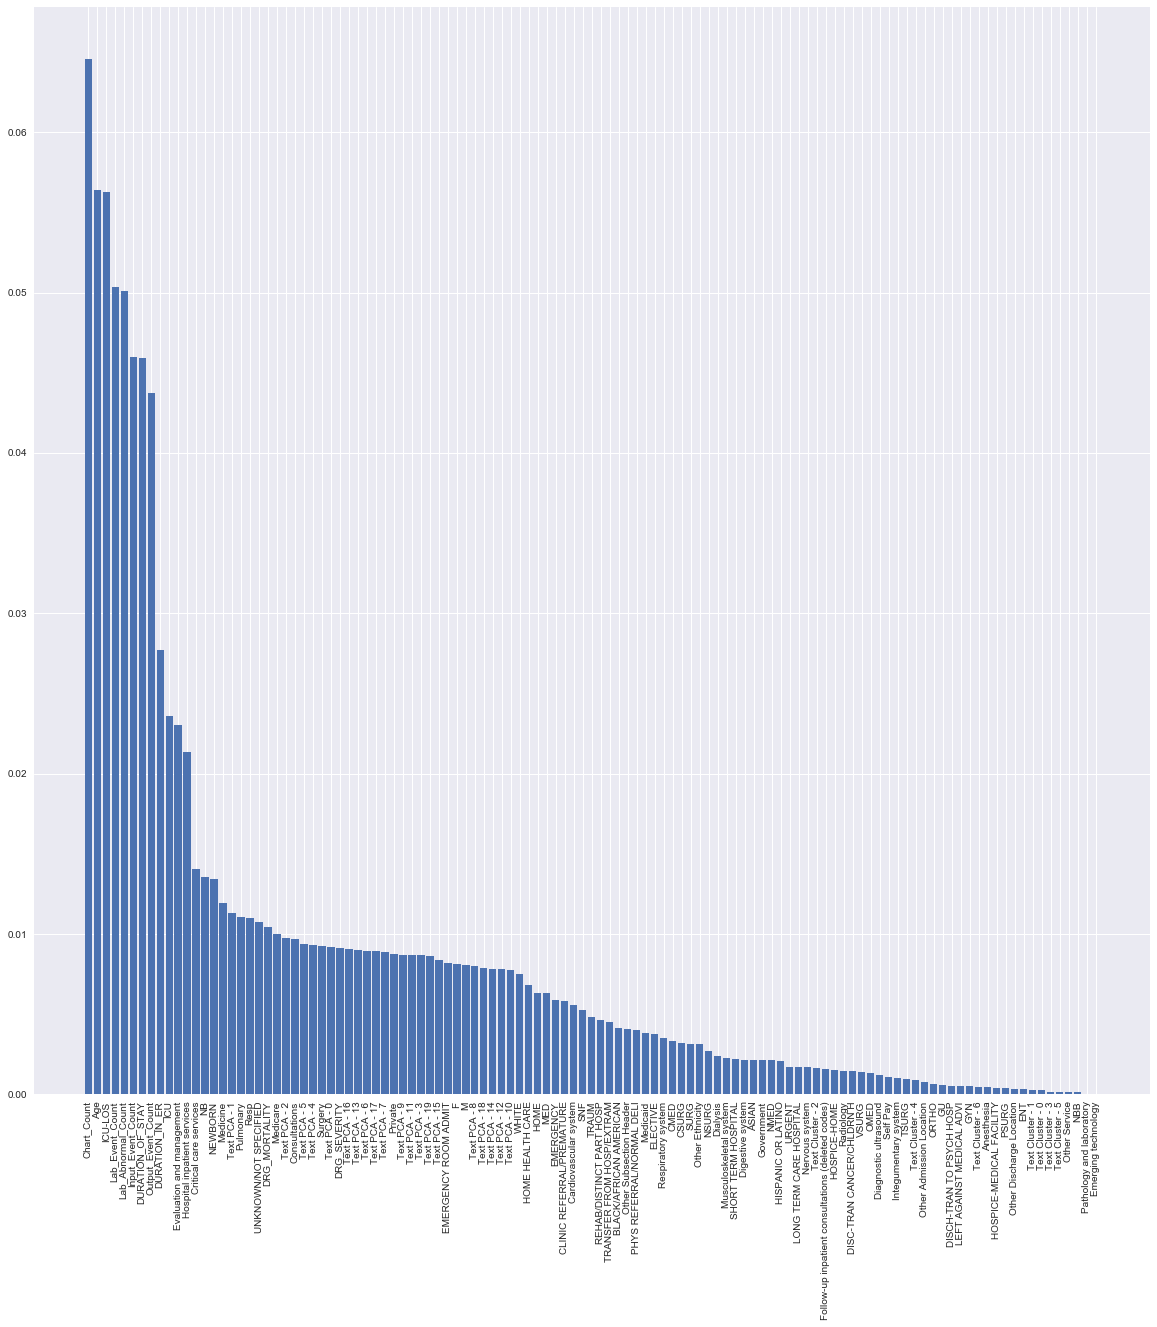

In [170]:
get_feature_importance(feature_importance_df[model_name], feature_importance_df['Features'])

### Top 10 Features

Random Forest - Train_top_10 Accuracy: 0.6989
Random Forest - Train_top_10 Precision: 0.3363
Random Forest - Train_top_10 Recall: 0.7257
Random Forest - Train_top_10 F1: 0.4596


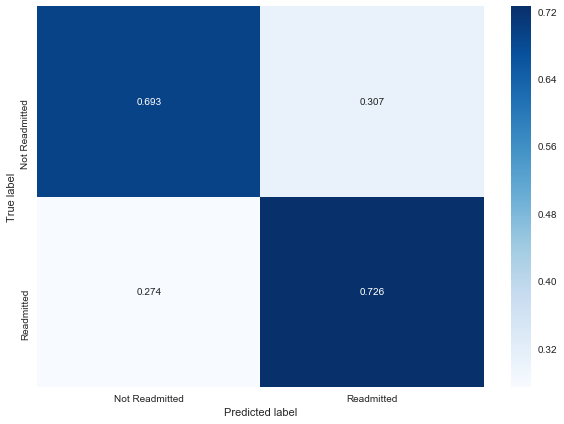

Random Forest - Test_top_10 Accuracy: 0.6829
Random Forest - Test_top_10 Precision: 0.3240
Random Forest - Test_top_10 Recall: 0.6792
Random Forest - Test_top_10 F1: 0.4387


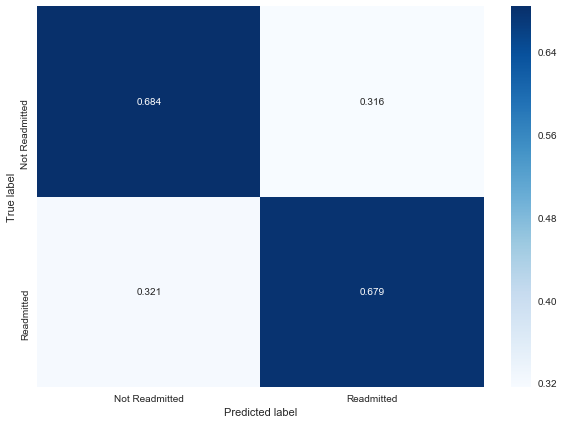

In [171]:
model_name = 'Random Forest'
predictions_suffix = '_top_10'
feature_importance_suffix = ' - Top 10'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions' + predictions_suffix],
                                   model_name + ' - Train' + predictions_suffix, scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions' + predictions_suffix],
                                   model_name + ' - Test' + predictions_suffix, scores_df)

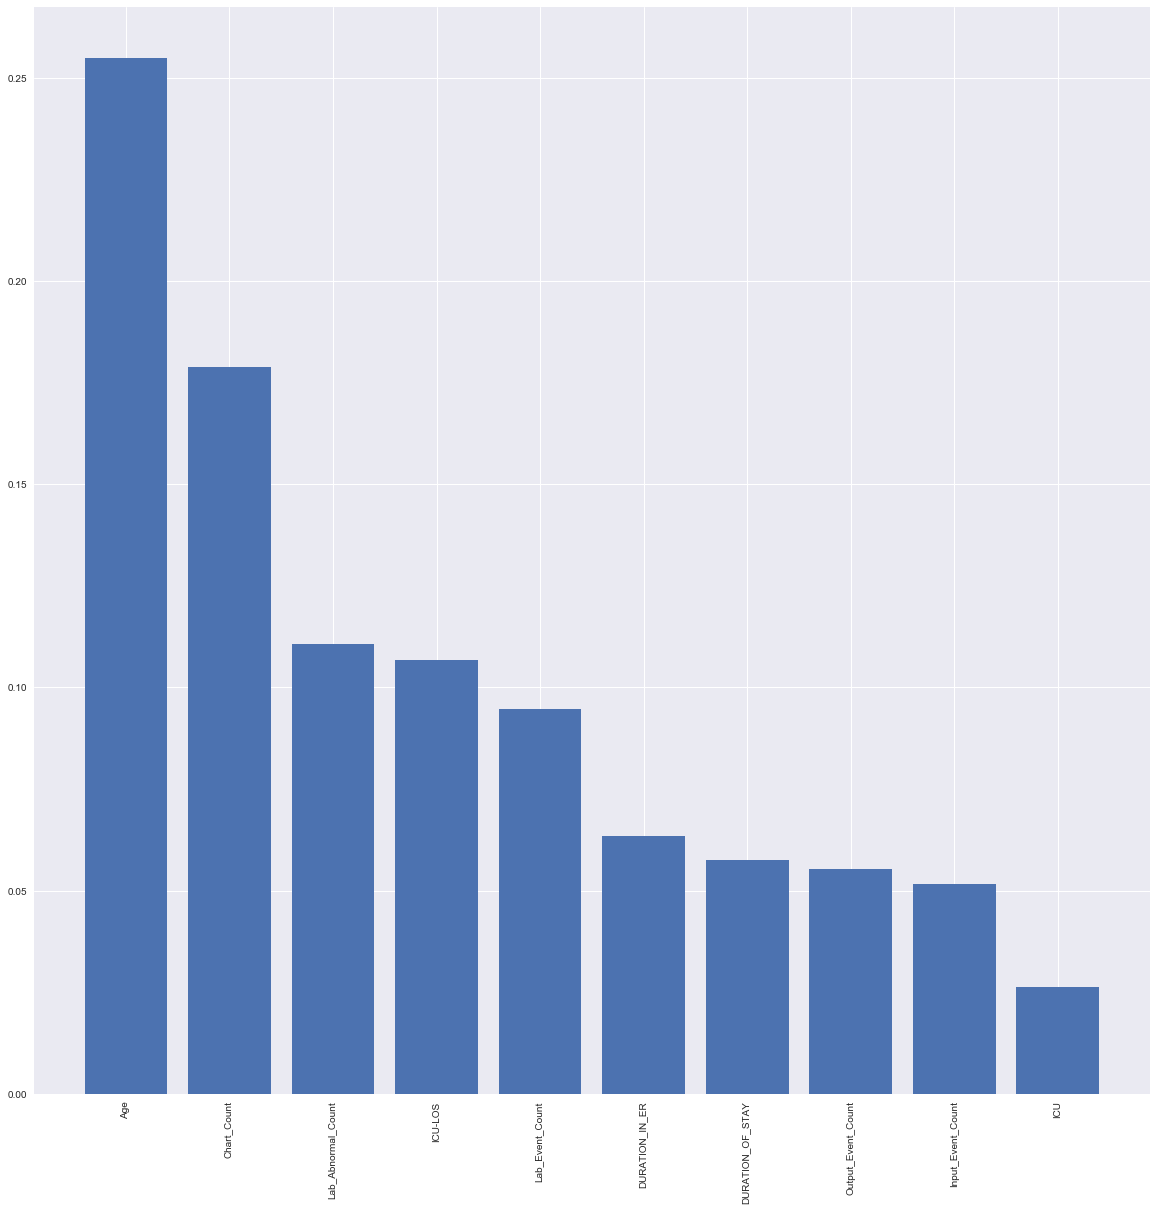

In [172]:
feature_importance_tag = model_name + feature_importance_suffix
feature_importance_subdf = feature_importance_df[feature_importance_df[feature_importance_tag].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[feature_importance_tag], feature_importance_subdf['Features'])

### Top 20 Features

Random Forest - Train_top_20 Accuracy: 0.6716
Random Forest - Train_top_20 Precision: 0.3245
Random Forest - Train_top_20 Recall: 0.7957
Random Forest - Train_top_20 F1: 0.4610


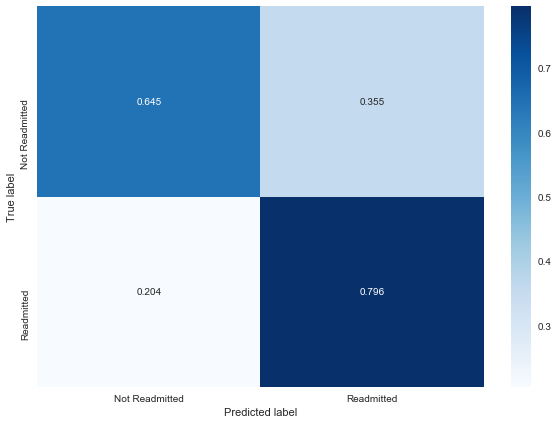

Random Forest - Test_top_20 Accuracy: 0.6542
Random Forest - Test_top_20 Precision: 0.3139
Random Forest - Test_top_20 Recall: 0.7547
Random Forest - Test_top_20 F1: 0.4433


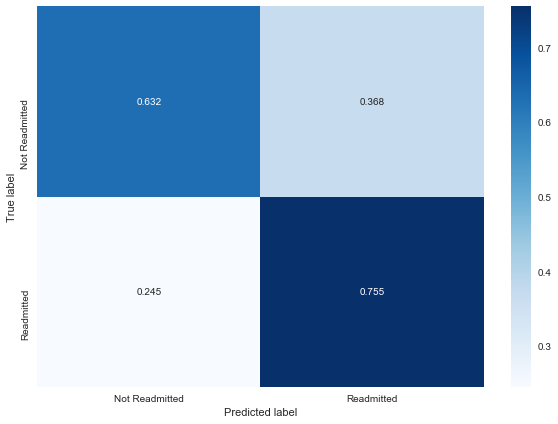

In [173]:
model_name = 'Random Forest'
predictions_suffix = '_top_20'
feature_importance_suffix = ' - Top 20'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions' + predictions_suffix],
                                   model_name + ' - Train' + predictions_suffix, scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions' + predictions_suffix],
                                   model_name + ' - Test' + predictions_suffix, scores_df)

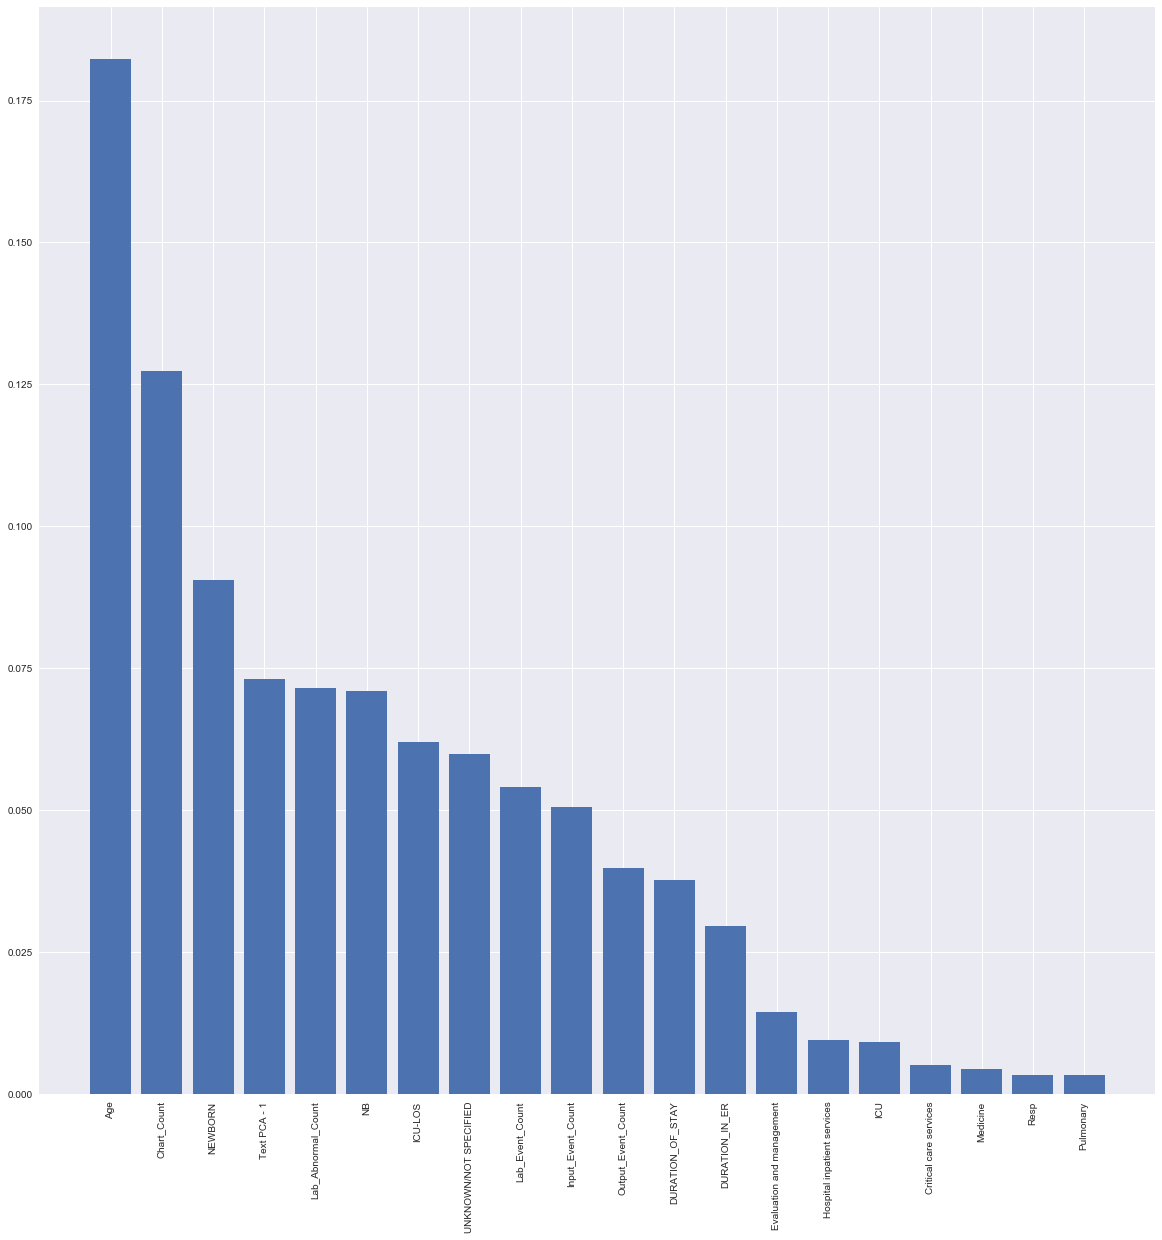

In [174]:
feature_importance_tag = model_name + feature_importance_suffix
feature_importance_subdf = feature_importance_df[feature_importance_df[feature_importance_tag].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[feature_importance_tag], feature_importance_subdf['Features'])

### Top 30 Features

Random Forest - Train_top_30 Accuracy: 0.6688
Random Forest - Train_top_30 Precision: 0.3232
Random Forest - Train_top_30 Recall: 0.8012
Random Forest - Train_top_30 F1: 0.4606


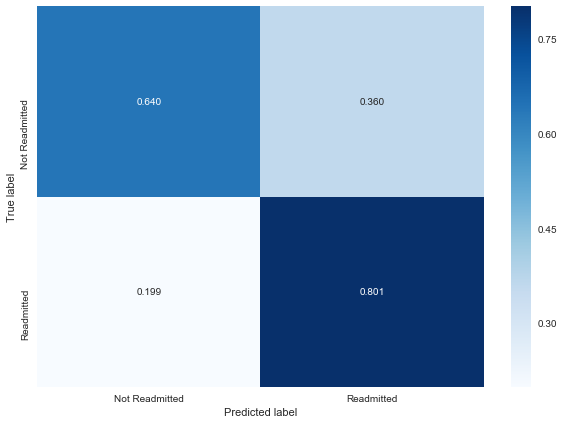

Random Forest - Test_top_30 Accuracy: 0.6544
Random Forest - Test_top_30 Precision: 0.3174
Random Forest - Test_top_30 Recall: 0.7768
Random Forest - Test_top_30 F1: 0.4507


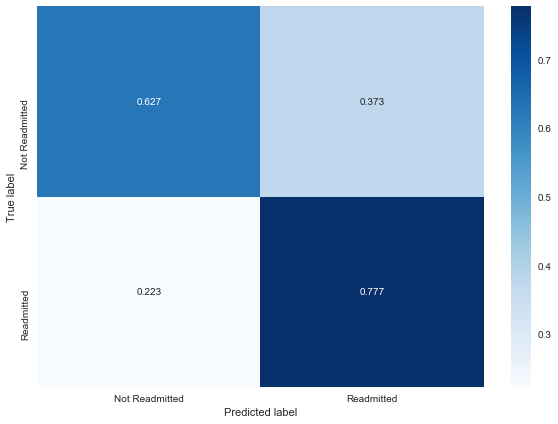

In [175]:
model_name = 'Random Forest'
predictions_suffix = '_top_30'
feature_importance_suffix = ' - Top 30'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions' + predictions_suffix],
                                   model_name + ' - Train' + predictions_suffix, scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions' + predictions_suffix],
                                   model_name + ' - Test' + predictions_suffix, scores_df)

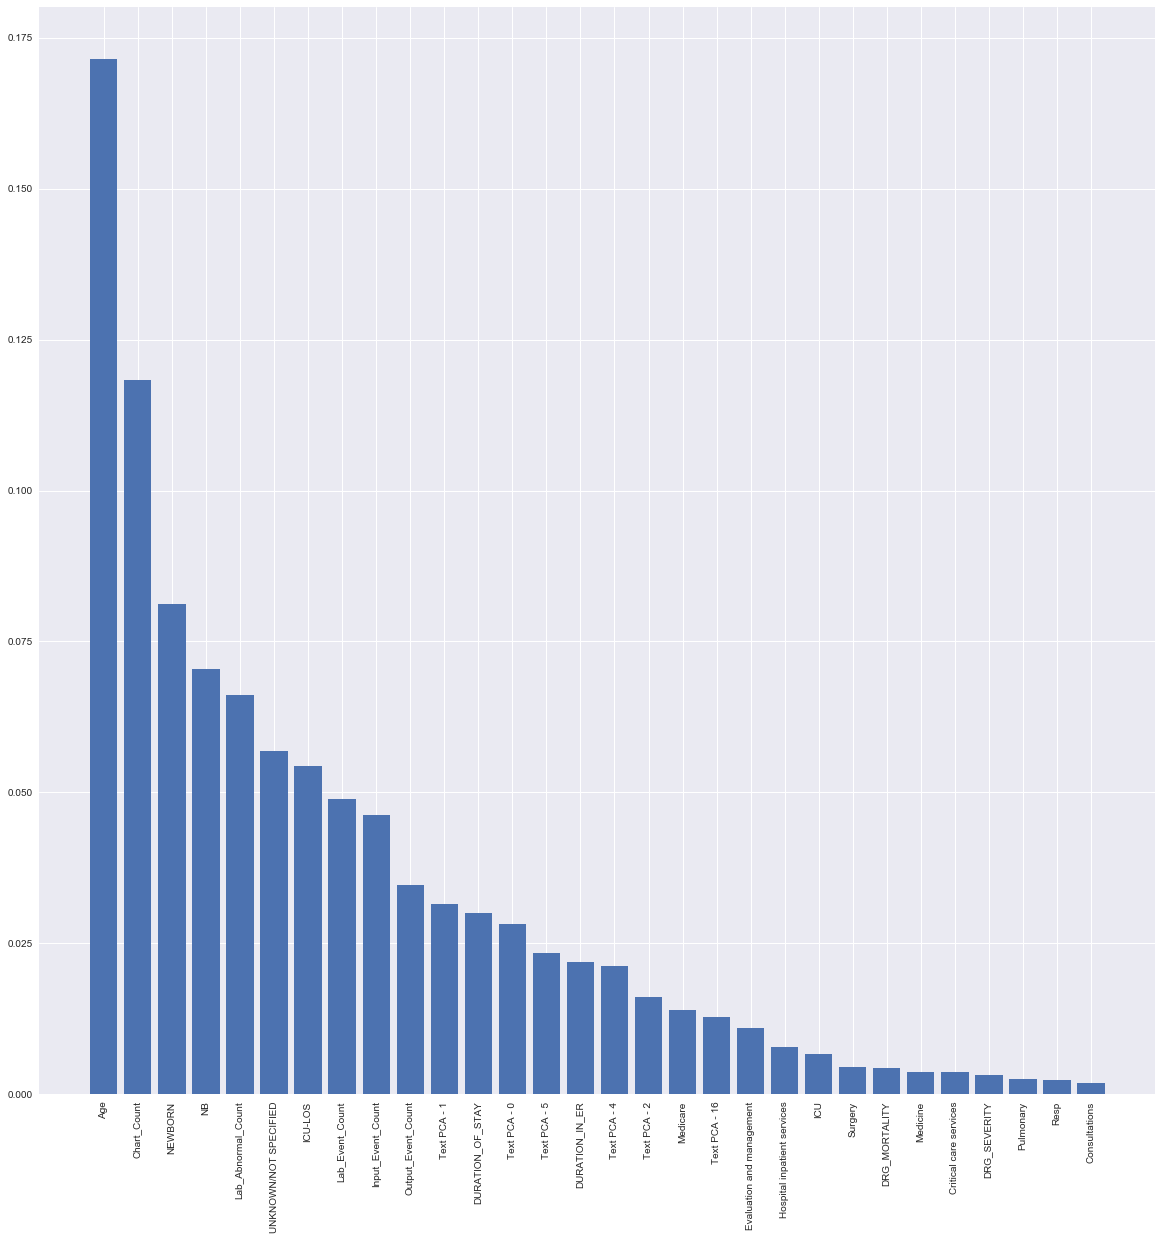

In [176]:
feature_importance_tag = model_name + feature_importance_suffix
feature_importance_subdf = feature_importance_df[feature_importance_df[feature_importance_tag].notnull()]
feature_importance_subdf = feature_importance_subdf.reset_index()
get_feature_importance(feature_importance_subdf[feature_importance_tag], feature_importance_subdf['Features'])

## XGBoost

XGBoost - Train Accuracy: 0.8431
XGBoost - Train Precision: 0.9557
XGBoost - Train Recall: 0.1162
XGBoost - Train F1: 0.2072


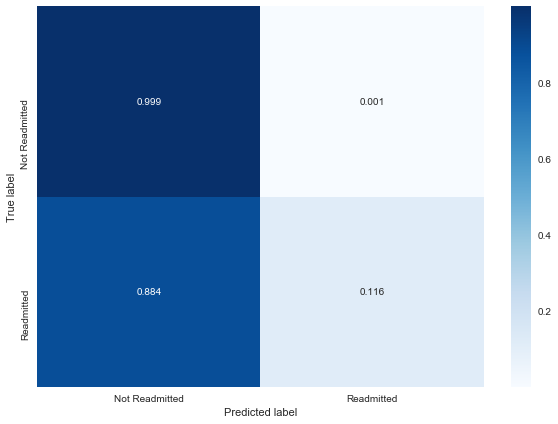

XGBoost - Test Accuracy: 0.8377
XGBoost - Test Precision: 0.9670
XGBoost - Test Recall: 0.1145
XGBoost - Test F1: 0.2048


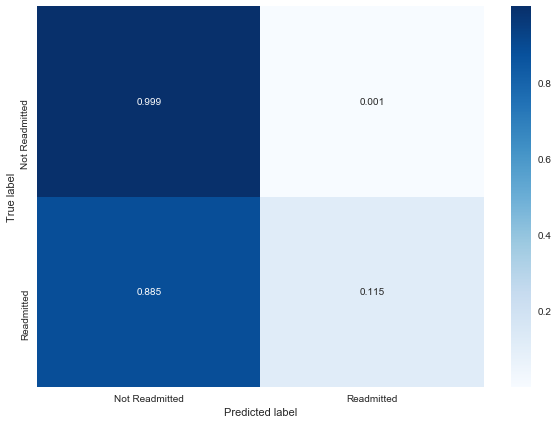

In [177]:
model_name = 'XGBoost'
scores_df = model_evaluation(train_predictions_df['READMISSION'],
                                    train_predictions_df[model_name + '_Train_Predictions'],
                                   model_name + ' - Train', scores_df)
scores_df = model_evaluation(test_predictions_df['READMISSION'],
                                    test_predictions_df[model_name + '_Test_Predictions'],
                                   model_name + ' - Test', scores_df)

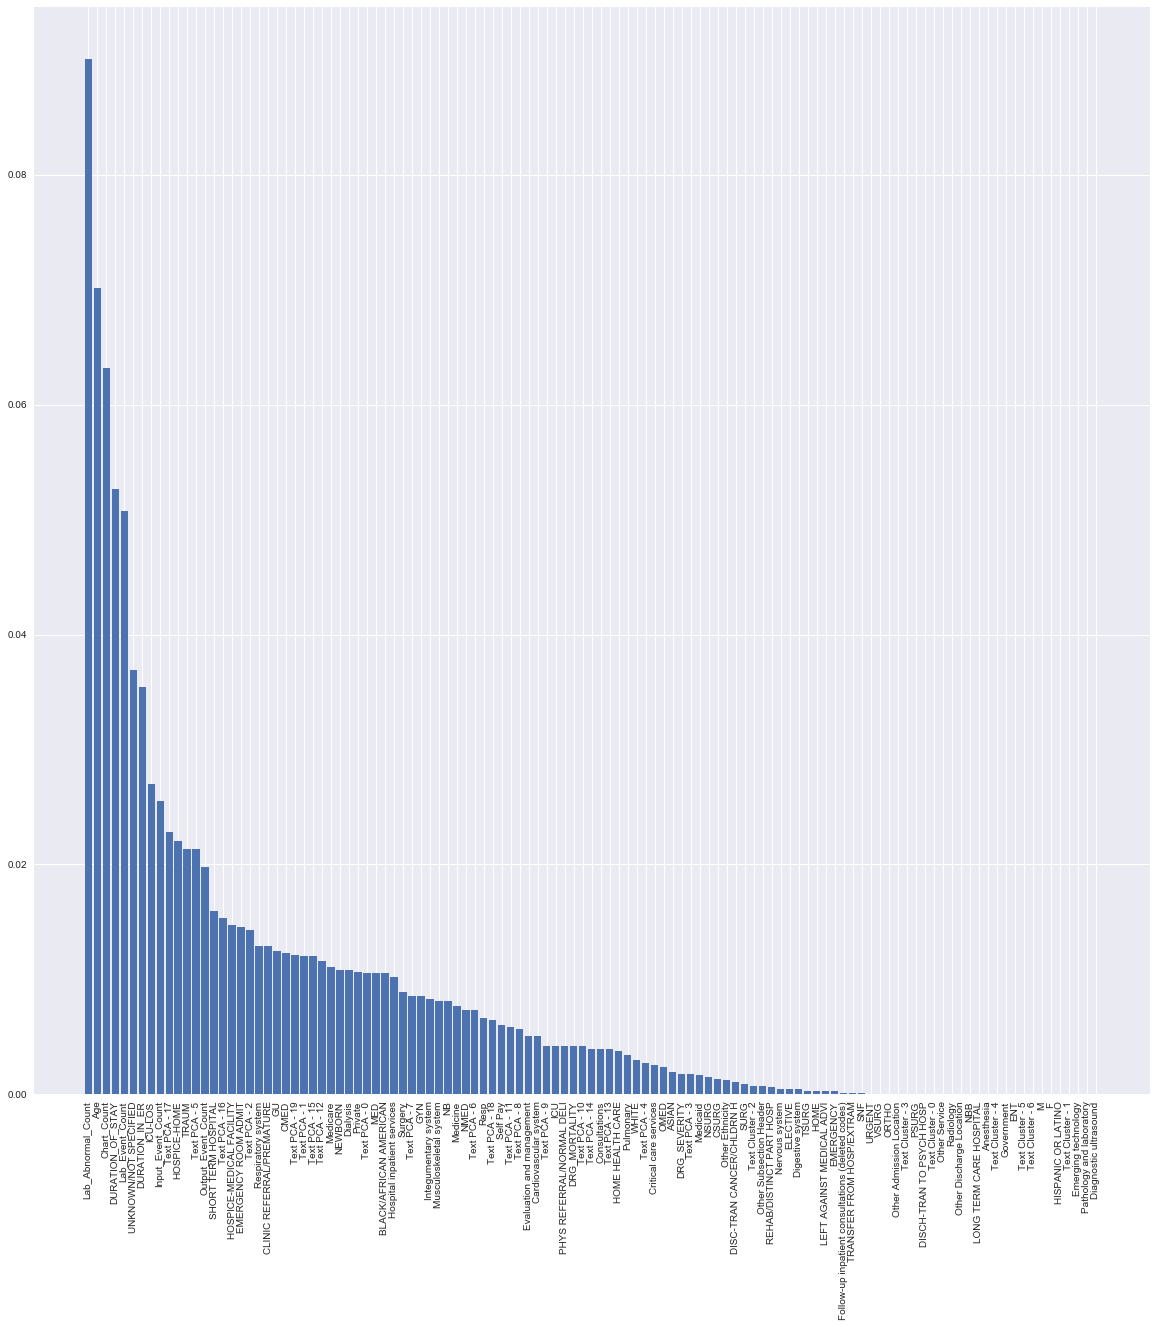

In [178]:
get_feature_importance(feature_importance_df[model_name], feature_importance_df['Features'])

## SVM

## All Models

In [179]:
scores_df['TrainTestFlag'] = scores_df['Model'].apply(lambda x: 'Train' if 'Train' in x else 'Test')
scores_df['Model'] = scores_df['Model'].apply(lambda x: x.replace(' - Train', '').replace('_', ' ').replace('top', 'Top'))
scores_df['Model'] = scores_df['Model'].apply(lambda x: x.replace(' - Test', '').replace('_', ' ').replace('top', 'Top'))
scores_df_train = scores_df[scores_df['TrainTestFlag'] == 'Train'].drop('TrainTestFlag', axis = 1)
scores_df_test = scores_df[scores_df['TrainTestFlag'] == 'Test'].drop('TrainTestFlag', axis = 1)

### Training

In [180]:
scores_df_train.sort_values('F1', ascending = False)

,Model,Accuracy,Precision,Recall,F1
0,Random Forest,1.000000,1.000000,1.000000,1.000000
0,Random Forest Top 20,0.671584,0.324463,0.795661,0.460954
0,Random Forest Top 30,0.668823,0.323202,0.801211,0.460601
0,Random Forest Top 10,0.698860,0.336321,0.725698,0.459629
0,Logistic Regression,0.615309,0.285119,0.782711,0.417980
0,Blind Guess All,0.176481,0.176481,1.000000,0.300015
0,XGBoost,0.843078,0.955740,0.116213,0.207227
0,Blind Guess None,0.823519,0.000000,0.000000,0.000000


### Testing

In [200]:
scores_df_test.sort_values('F1', ascending = False)

,Model,Accuracy,Precision,Recall,F1
0,Random Forest Top 30,0.654399,0.317384,0.776838,0.450651
0,Random Forest Top 20,0.654161,0.313853,0.754717,0.443340
0,Random Forest Top 10,0.682892,0.324022,0.679245,0.438748
0,Logistic Regression,0.608216,0.289769,0.790501,0.424084
0,Blind Guess All,0.182477,0.182477,1.000000,0.308635
0,Random Forest,0.836400,0.876777,0.120364,0.211670
0,XGBoost,0.837706,0.967033,0.114509,0.204770
0,Blind Guess None,0.817523,0.000000,0.000000,0.000000


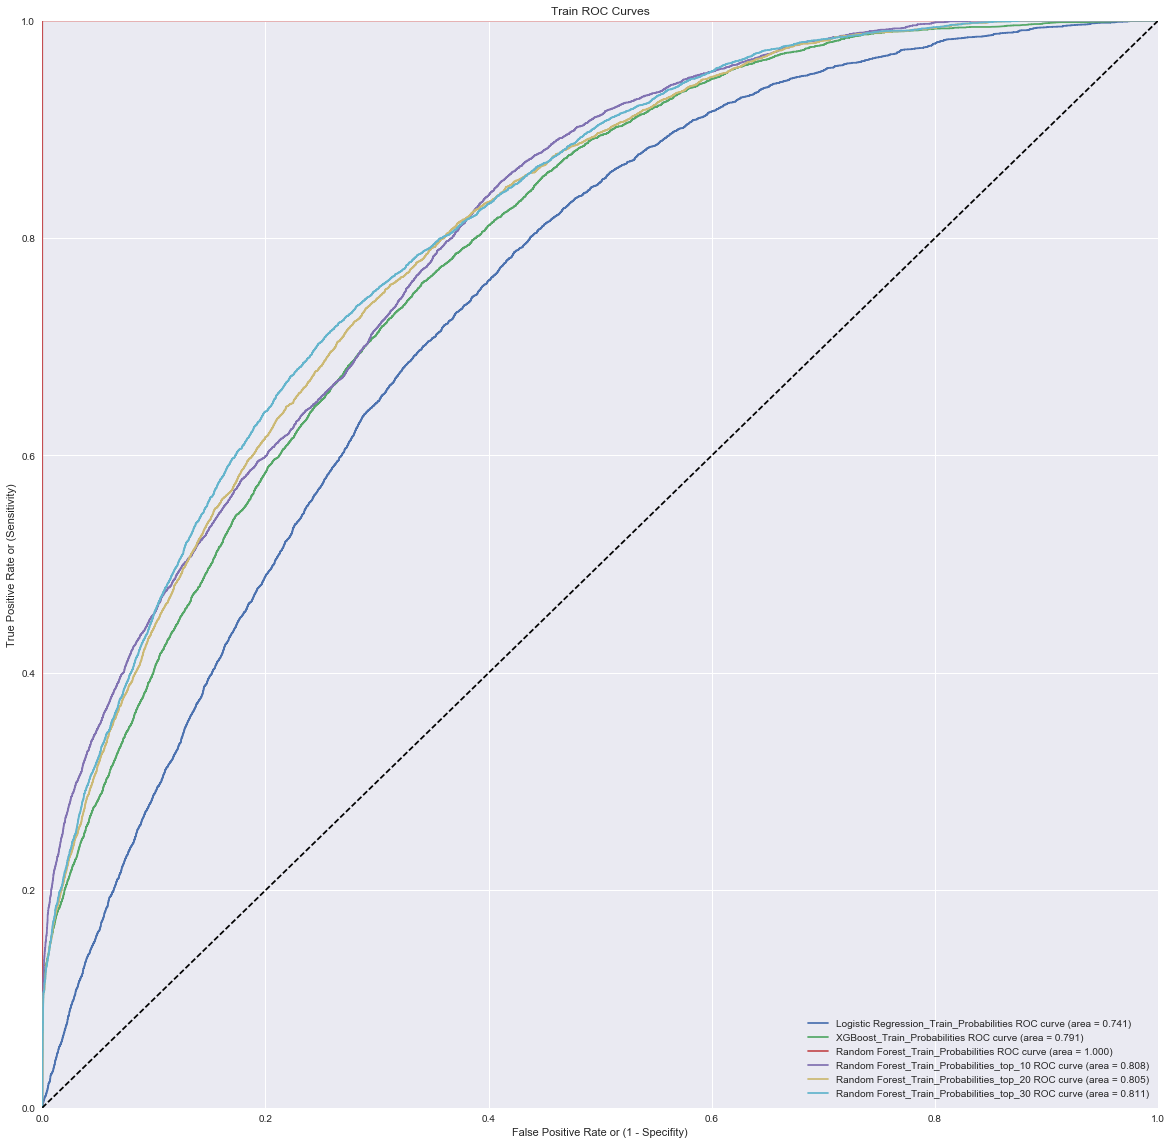

In [218]:
train_probability_columns = [column for column in train_predictions_df.columns if 'Probabilities' in column]
plot_roc(train_predictions_df['READMISSION'], train_predictions_df[train_probability_columns], 'Train')

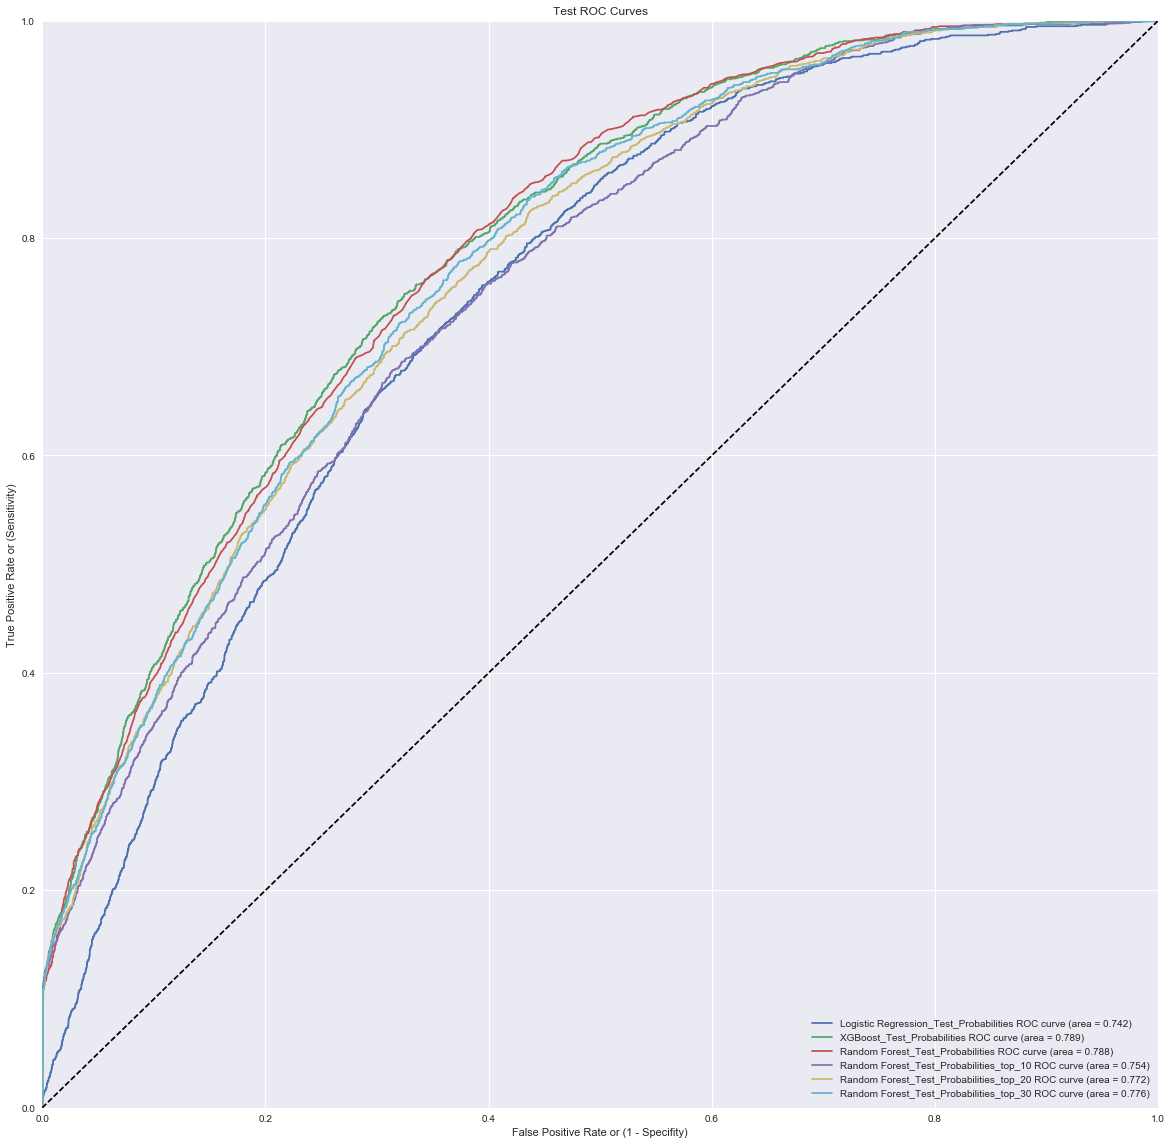

In [219]:
test_probability_columns = [column for column in test_predictions_df.columns if 'Probabilities' in column]
plot_roc(test_predictions_df['READMISSION'], test_predictions_df[test_probability_columns], 'Test')

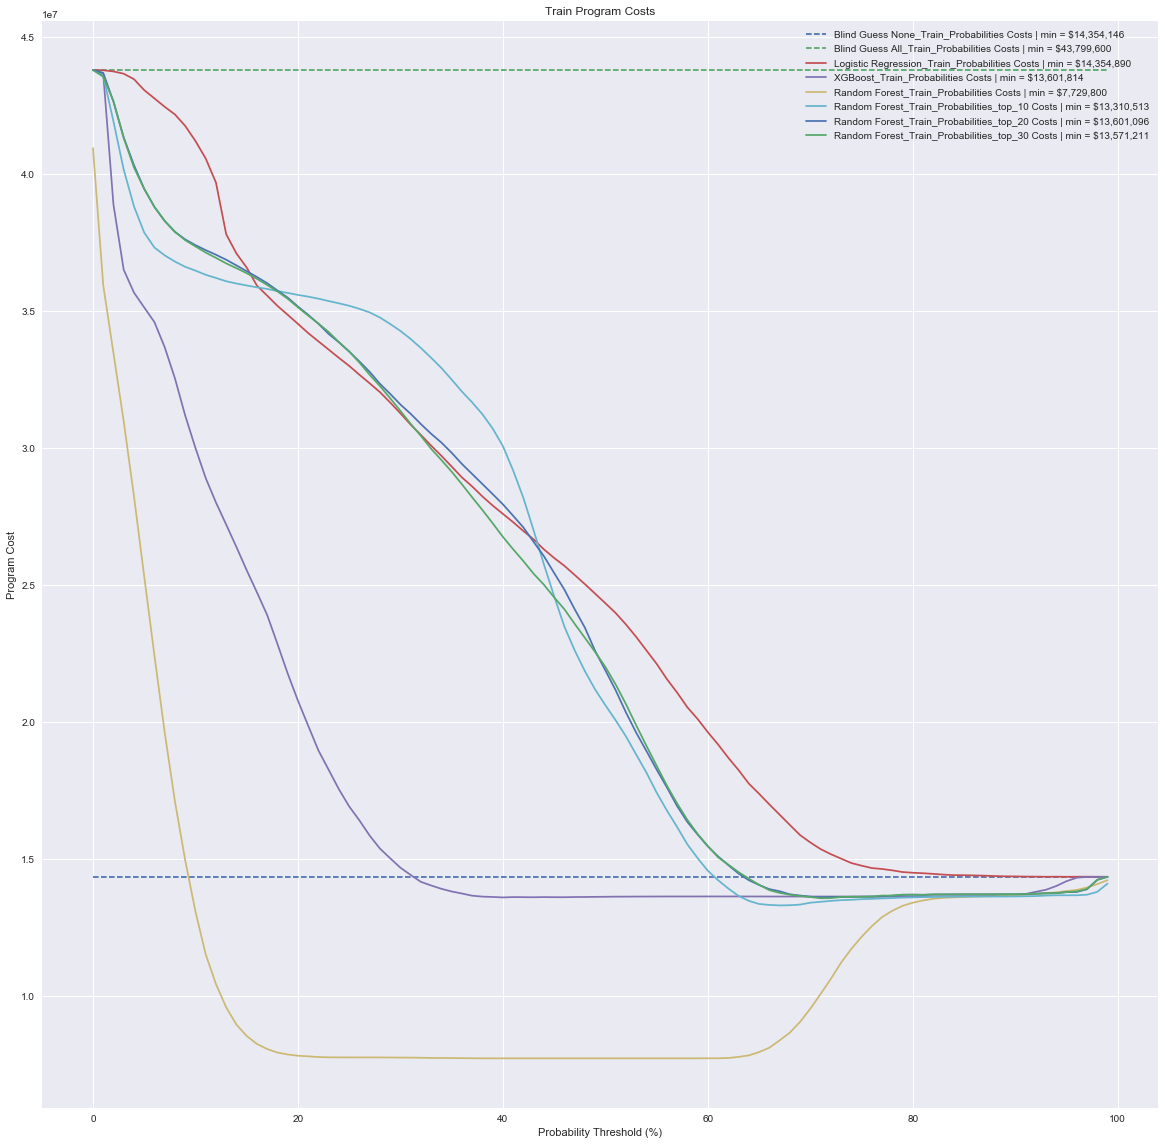

In [220]:
plot_cost_effectiveness(train_predictions_df['READMISSION'], train_predictions_df[train_probability_columns], 'Train')

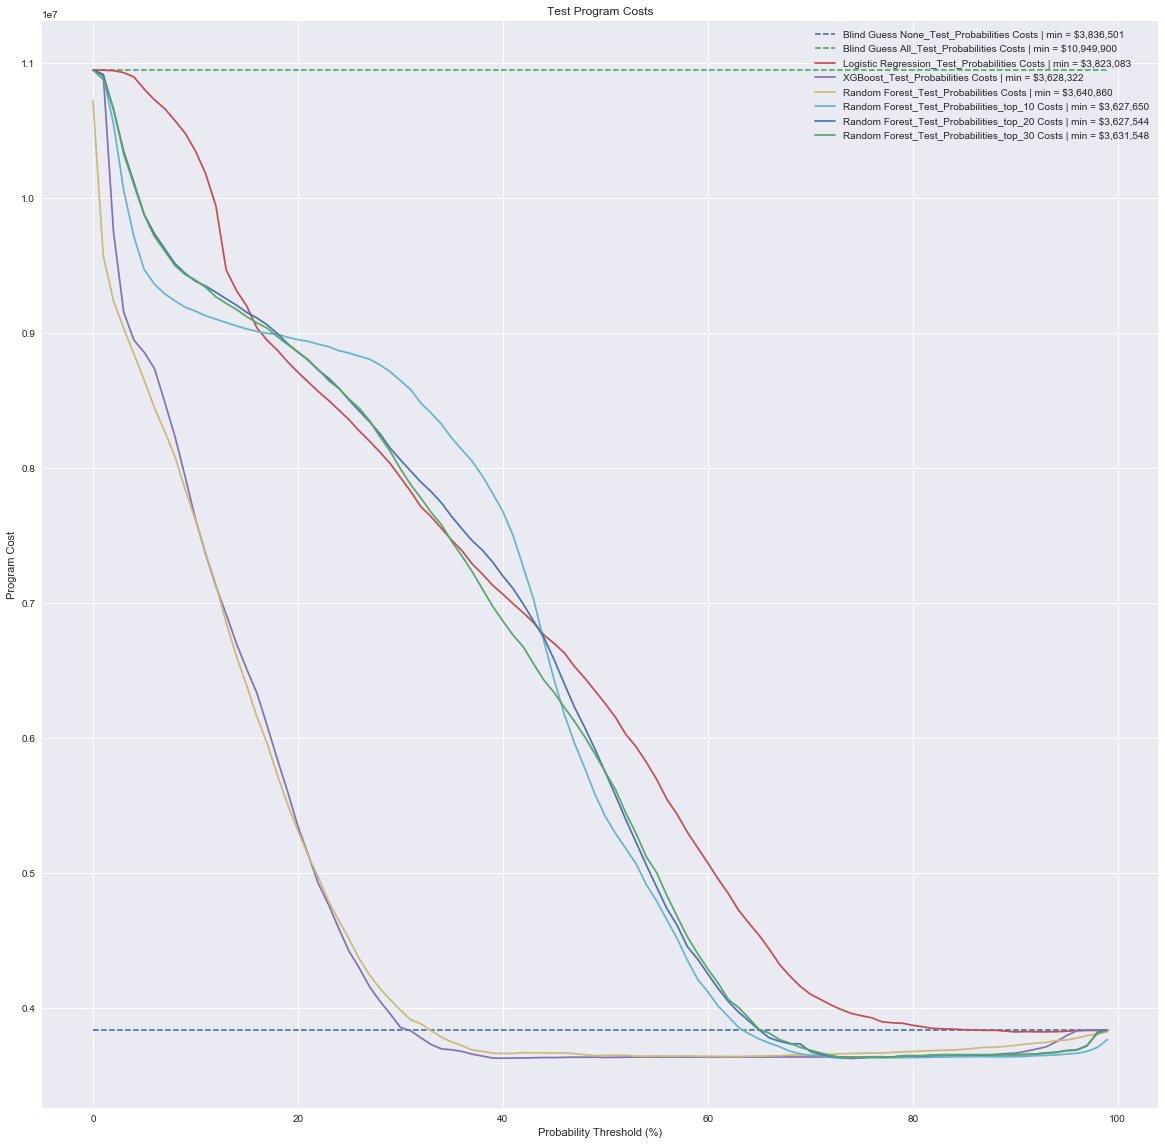

In [221]:
plot_cost_effectiveness(test_predictions_df['READMISSION'], test_predictions_df[test_probability_columns], 'Test')

 # Ensemble